<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap10/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import datetime
datetime_object = datetime.datetime.now()
print(datetime_object)

2020-03-28 17:02:56.522931


In [3]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-xc8hw9sn
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-xc8hw9sn
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=89b3e2889900720600d81584321082bc03ca0938655cdb0284c965ad53a56e9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tsbbpg68/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [4]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [5]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap10/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap10
Trial.ipynb
gradcam.py
load_data.py
model.py
show_images.py
train_test.py
__init__.py
transforms.py
lr_finder.py
evaluate.py
__init__.cpython-36.pyc
load_data.cpython-36.pyc
show_images.cpython-36.pyc
model.cpython-36.pyc
train_test.cpython-36.pyc
evaluate.cpython-36.pyc
transforms.cpython-36.pyc
gradcam.cpython-36.pyc
lr_finder.cpython-36.pyc
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


In [6]:
%matplotlib inline
import torch
from template import load_data
from template import show_images
from template import model
from template import train_test
from template import evaluate
from template import transforms
from template import gradcam
from template import lr_finder

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
import albumentations as A
train_transform_list = [
                          A.Rotate((-30.0, 30.0)),
                          A.HorizontalFlip(),
                          A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                          A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) # fillvalue is 0 after normalizing as mean is 0
                       ]
test_transform_list = [A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))]
train_transform = transforms.AlbumentationTransforms(train_transform_list)
test_transform = transforms.AlbumentationTransforms(test_transform_list)

In [8]:
classes, trainloader, testloader = load_data.load(train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


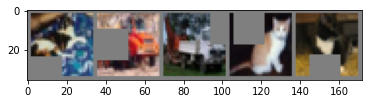

In [9]:
show_images.show_images(trainloader, classes)

In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR , MultiStepLR, ReduceLROnPlateau
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1,momentum=0.9 ,weight_decay = 0.0005)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)
scheduler = ReduceLROnPlateau(optimizer, patience = 8)

In [12]:
testLoss = []
testAcc = []
EPOCHS = 50
#best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
     scheduler.step(test_loss[-1])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.7084614038467407 Batch_id=390 Accuracy=26.03: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0128, Accuracy: 3966/10000 (39.66%)

EPOCH: 2 LR: 0.1


Loss=1.702143669128418 Batch_id=390 Accuracy=40.77: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 4760/10000 (47.60%)

EPOCH: 3 LR: 0.1


Loss=1.3194199800491333 Batch_id=390 Accuracy=47.83: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 5602/10000 (56.02%)

EPOCH: 4 LR: 0.1


Loss=1.2768640518188477 Batch_id=390 Accuracy=53.47: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 6111/10000 (61.11%)

EPOCH: 5 LR: 0.1


Loss=1.0175827741622925 Batch_id=390 Accuracy=57.32: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6490/10000 (64.90%)

EPOCH: 6 LR: 0.1


Loss=1.0660990476608276 Batch_id=390 Accuracy=60.22: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6649/10000 (66.49%)

EPOCH: 7 LR: 0.1


Loss=1.1214488744735718 Batch_id=390 Accuracy=63.35: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6667/10000 (66.67%)

EPOCH: 8 LR: 0.1


Loss=1.0795419216156006 Batch_id=390 Accuracy=65.54: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6776/10000 (67.76%)

EPOCH: 9 LR: 0.1


Loss=0.965849757194519 Batch_id=390 Accuracy=68.00: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7115/10000 (71.15%)

EPOCH: 10 LR: 0.1


Loss=0.9981894493103027 Batch_id=390 Accuracy=69.66: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7192/10000 (71.92%)

EPOCH: 11 LR: 0.1


Loss=0.844498336315155 Batch_id=390 Accuracy=70.74: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7754/10000 (77.54%)

EPOCH: 12 LR: 0.1


Loss=0.8103295564651489 Batch_id=390 Accuracy=72.74: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7680/10000 (76.80%)

EPOCH: 13 LR: 0.1


Loss=0.6828168034553528 Batch_id=390 Accuracy=73.29: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7500/10000 (75.00%)

EPOCH: 14 LR: 0.1


Loss=0.9536380767822266 Batch_id=390 Accuracy=73.99: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7664/10000 (76.64%)

EPOCH: 15 LR: 0.1


Loss=0.5980121493339539 Batch_id=390 Accuracy=74.82: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7913/10000 (79.13%)

EPOCH: 16 LR: 0.1


Loss=0.5654917359352112 Batch_id=390 Accuracy=75.28: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7824/10000 (78.24%)

EPOCH: 17 LR: 0.1


Loss=0.6593599319458008 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7728/10000 (77.28%)

EPOCH: 18 LR: 0.1


Loss=0.7170189619064331 Batch_id=390 Accuracy=75.74: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8071/10000 (80.71%)

EPOCH: 19 LR: 0.1


Loss=0.6490848660469055 Batch_id=390 Accuracy=76.54: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7707/10000 (77.07%)

EPOCH: 20 LR: 0.1


Loss=0.7431905269622803 Batch_id=390 Accuracy=76.68: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7949/10000 (79.49%)

EPOCH: 21 LR: 0.1


Loss=0.623770534992218 Batch_id=390 Accuracy=76.95: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8090/10000 (80.90%)

EPOCH: 22 LR: 0.1


Loss=0.7744745016098022 Batch_id=390 Accuracy=77.03: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7513/10000 (75.13%)

EPOCH: 23 LR: 0.1


Loss=0.7812380790710449 Batch_id=390 Accuracy=77.74: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8170/10000 (81.70%)

EPOCH: 24 LR: 0.1


Loss=0.6947927474975586 Batch_id=390 Accuracy=77.64: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8236/10000 (82.36%)

EPOCH: 25 LR: 0.1


Loss=0.6300367116928101 Batch_id=390 Accuracy=77.92: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7899/10000 (78.99%)

EPOCH: 26 LR: 0.1


Loss=0.4712163805961609 Batch_id=390 Accuracy=78.49: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8184/10000 (81.84%)

EPOCH: 27 LR: 0.1


Loss=0.7081878185272217 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8075/10000 (80.75%)

EPOCH: 28 LR: 0.1


Loss=0.49116620421409607 Batch_id=390 Accuracy=78.34: 100%|██████████| 391/391 [00:32<00:00, 11.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8009/10000 (80.09%)

EPOCH: 29 LR: 0.1


Loss=0.4674503803253174 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8154/10000 (81.54%)

EPOCH: 30 LR: 0.1


Loss=0.7352592349052429 Batch_id=390 Accuracy=78.94: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7874/10000 (78.74%)

EPOCH: 31 LR: 0.1


Loss=0.6862348914146423 Batch_id=390 Accuracy=78.46: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8142/10000 (81.42%)

EPOCH: 32 LR: 0.1


Loss=0.47600507736206055 Batch_id=390 Accuracy=78.92: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8430/10000 (84.30%)

EPOCH: 33 LR: 0.1


Loss=0.592759907245636 Batch_id=390 Accuracy=79.12: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8257/10000 (82.57%)

EPOCH: 34 LR: 0.1


Loss=0.5684555768966675 Batch_id=390 Accuracy=79.52: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8150/10000 (81.50%)

EPOCH: 35 LR: 0.1


Loss=0.5128315091133118 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7974/10000 (79.74%)

EPOCH: 36 LR: 0.1


Loss=0.7016074061393738 Batch_id=390 Accuracy=79.16: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8402/10000 (84.02%)

EPOCH: 37 LR: 0.1


Loss=0.4776269793510437 Batch_id=390 Accuracy=79.57: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8215/10000 (82.15%)

EPOCH: 38 LR: 0.1


Loss=0.570076584815979 Batch_id=390 Accuracy=79.26: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8240/10000 (82.40%)

EPOCH: 39 LR: 0.1


Loss=0.6562744379043579 Batch_id=390 Accuracy=79.50: 100%|██████████| 391/391 [00:33<00:00, 11.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8169/10000 (81.69%)

EPOCH: 40 LR: 0.1


Loss=0.6406307816505432 Batch_id=390 Accuracy=79.92: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8218/10000 (82.18%)

EPOCH: 41 LR: 0.1


Loss=0.8095933794975281 Batch_id=390 Accuracy=79.75: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8409/10000 (84.09%)

EPOCH: 42 LR: 0.010000000000000002


Loss=0.36236757040023804 Batch_id=390 Accuracy=86.10: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9041/10000 (90.41%)

EPOCH: 43 LR: 0.010000000000000002


Loss=0.26923230290412903 Batch_id=390 Accuracy=88.08: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9156/10000 (91.56%)

EPOCH: 44 LR: 0.010000000000000002


Loss=0.5685545206069946 Batch_id=390 Accuracy=89.01: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9137/10000 (91.37%)

EPOCH: 45 LR: 0.010000000000000002


Loss=0.2456396520137787 Batch_id=390 Accuracy=89.76: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 9178/10000 (91.78%)

EPOCH: 46 LR: 0.010000000000000002


Loss=0.2839321494102478 Batch_id=390 Accuracy=90.48: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 9170/10000 (91.70%)

EPOCH: 47 LR: 0.010000000000000002


Loss=0.26847678422927856 Batch_id=390 Accuracy=90.70: 100%|██████████| 391/391 [00:33<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 9182/10000 (91.82%)

EPOCH: 48 LR: 0.010000000000000002


Loss=0.20728203654289246 Batch_id=390 Accuracy=90.94: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 9205/10000 (92.05%)

EPOCH: 49 LR: 0.010000000000000002


Loss=0.17813698947429657 Batch_id=390 Accuracy=91.32: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 9190/10000 (91.90%)

EPOCH: 50 LR: 0.010000000000000002


Loss=0.11442410945892334 Batch_id=390 Accuracy=91.54: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]



Test set: Average loss: 0.0018, Accuracy: 9236/10000 (92.36%)



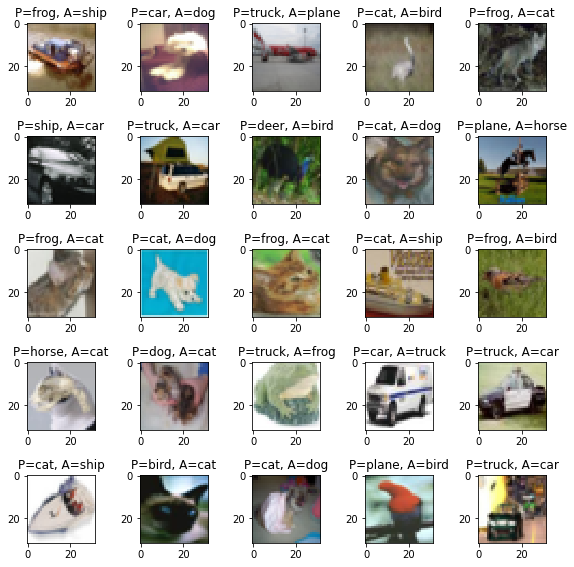

In [13]:
misclassified_images = evaluate.show_misclassified_images(model, device, testloader, classes)

In [14]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 92 %


In [15]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 89 %
Accuracy of   car : 97 %
Accuracy of  bird : 83 %
Accuracy of   cat : 84 %
Accuracy of  deer : 86 %
Accuracy of   dog : 87 %
Accuracy of  frog : 100 %
Accuracy of horse : 94 %
Accuracy of  ship : 89 %
Accuracy of truck : 96 %


In [0]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)

Text(0.5, 1.0, 'Test Accuracy')

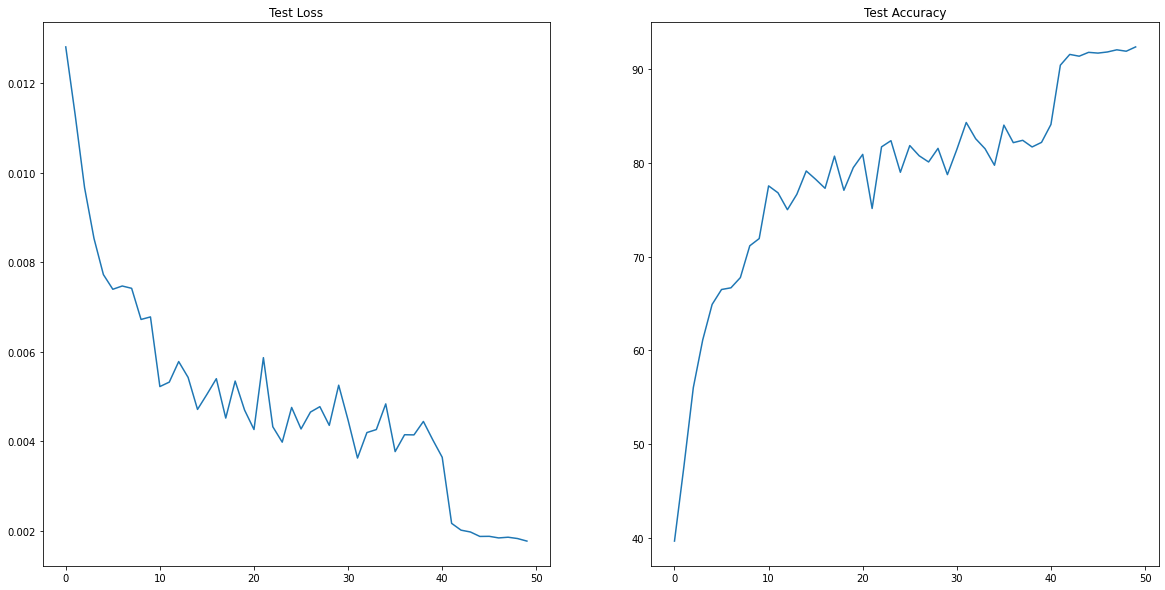

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


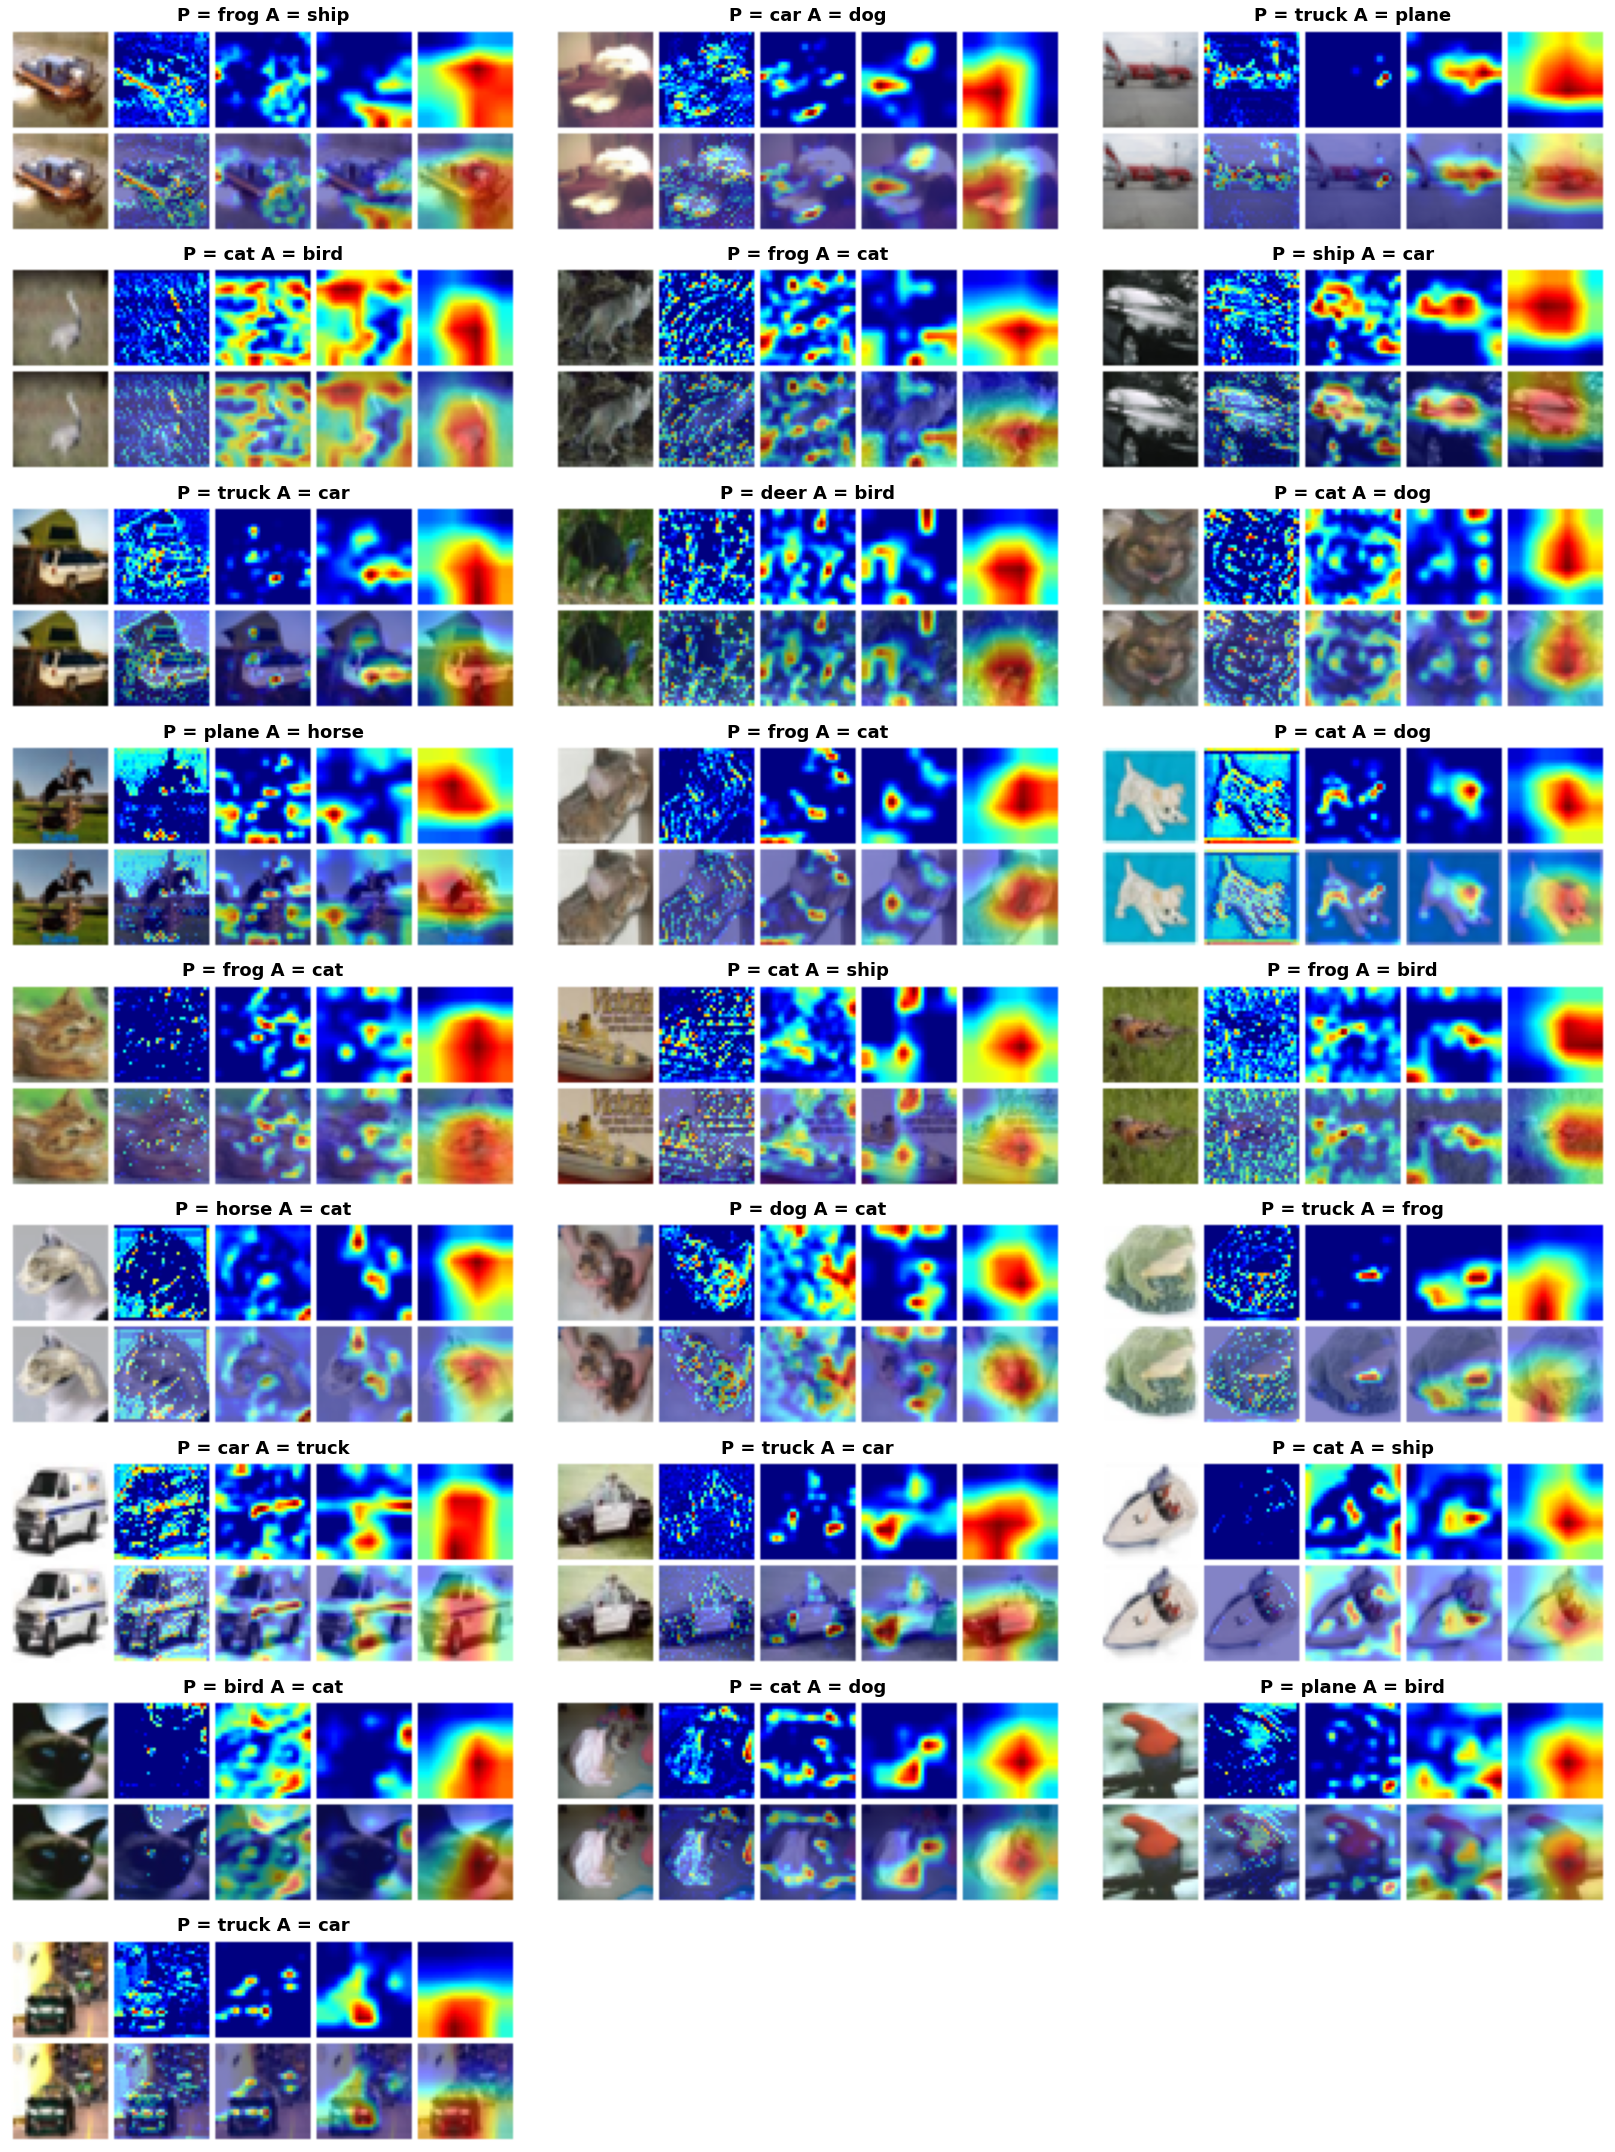

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from torchvision.utils import make_grid, save_image
fig = plt.figure(figsize=(23,30))
for i,k in enumerate(misclassified_images):
  images1 = [misclassified_images[i][0].cpu()/2+0.5]
  images2 =  [misclassified_images[i][0].cpu()/2+0.5]
  b = model.to(device)
  # output = model(misclassified_images[i][0])
  # _, predicted = torch.max(output.data, 1)
  #print(classes[int(predicted)])
  layers =  [model.layer1,model.layer2,model.layer3,model.layer4]
  for j in layers:
    g = gradcam.GradCAM(b,j)
    mask, _= g(misclassified_images[i][0].clone().unsqueeze_(0))
    heatmap, result = gradcam.visualize_cam(mask,misclassified_images[i][0].clone().unsqueeze_(0)/2+0.5 )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2,nrow=5,pad_value=1)
  npimg = grid_image.numpy()
  sub = fig.add_subplot(9, 3, i+1) 
 
  # fig.subplots_adjust(wspace=0)
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  sub.set_title('P = '+classes[int(misclassified_images[i][1])]+" A = "+classes[int(misclassified_images[i][2])],fontweight="bold",fontsize=18)
  sub.axis("off")
plt.tight_layout()
fig.subplots_adjust(wspace=0)

In [19]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR , MultiStepLR

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=0.00001)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)
lrfinder = lr_finder.LRFinder(model, optimiser, criterion, device="cuda")
lrfinder.range_test(trainloader, val_loader=testloader, end_lr=10, num_iter=700 ,step_mode="exp")

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


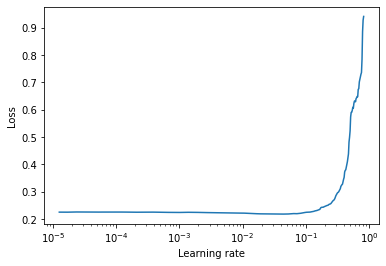

In [21]:
lrfinder.plot()

In [0]:
lrfinder.reset()

In [23]:
lrfinder.history['lr'][lrfinder.history['loss'].index(lrfinder.best_loss)]

0.039032698000770326